# Evaluating performance

Analysis by [Laurent Lessard](https://laurentlessard.com/) and [Vincent Tjeng](https://vtjeng.com).

This file applies the strategy from `wordle_solver.ipynb` to all possible words and creates histograms to show the results. 

For efficiency, `performance.ipynb` pre-computes and cache all possible measurements of word pairs (via `cache_word_scores`) and works with the indices of the words in the `ALL_WORDS` list, rather than the words themselves. This improves efficiency significantly as we run the strategy repeatedly on all words in the dictionary.

In [1]:
# for prop, freqtable
using FreqTables
include("utils.jl");

Unable to init server: Could not connect: Connection refused
Unable to init server: Could not connect: Connection refused

(.:8241): Gdk-CRITICAL **: 18:42:04.203: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed

(.:8241): Gdk-CRITICAL **: 18:42:04.208: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed


In [2]:
cache_word_scores(ALL_WORDS, ALL_WORDS)

 69.905939 seconds (996.38 M allocations: 80.041 GiB, 13.09% gc time, 0.01% compilation time)


## Helper Functions

In [3]:
function get_display_text(heuristic::Heuristic)::String
    if heuristic == PRIORITIZE_MAX_GROUP_SIZE
        return "size"
    elseif heuristic == PRIORITIZE_ENTROPY
        return "entropy"
    elseif heuristic == PRIORITIZE_SPLITS
        return "splits"
    end
    throw(ArgumentError("Unexpected heuristic."))
end

function generate_stats(;
    guess_all_words::Bool = false,
    hard_mode::Bool = false,
    heuristic::Heuristic = PRIORITIZE_ENTROPY
)
    num_turns = get_num_turns(
        guess_all_words ? ALL_WORD_IDXS : SOLUTION_WORD_IDXS,
        SOLUTION_WORD_IDXS,
        heuristic = heuristic,
        hard_mode = hard_mode,
        verbose = true
    )

    heuristic_text = get_display_text(heuristic)
    fn_1 = hard_mode ? "hard_mode_" : ""
    fn_2 = guess_all_words ? "any_guess_" : "solutions_only_"
    tt_1 = hard_mode ? "hard mode, " : ""
    tt_2 = guess_all_words ? "any guess allowed " : "only guess from solutions list "
    plot_num_turns(
        num_turns,
        title_text = "$(tt_1)$(tt_2)(max-$(heuristic_text))",
        saved_filename = "strat_using_$(fn_1)$(fn_2)prioritize_$(heuristic_text).png"
    )

    println("\nProportions")
    println(prop(freqtable(num_turns)))

    println("\nMean Score")
    println(Statistics.mean(num_turns))
end

generate_stats (generic function with 1 method)

## Results

### Using only solution words as guesses, prioritizing entropy

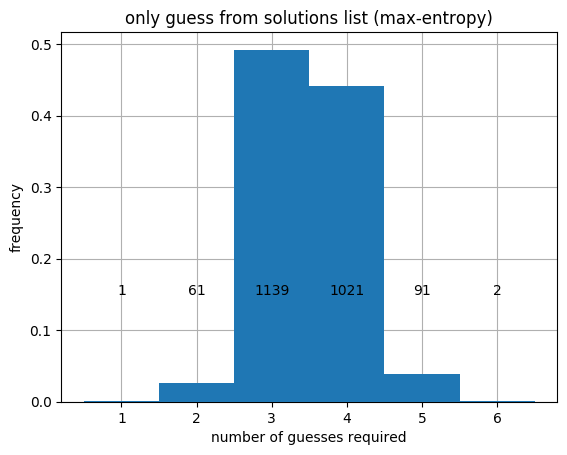

Guess: raise

Proportions
6-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0263499
3     │    0.492009
4     │    0.441037
5     │   0.0393089
6     │ 0.000863931

Mean Score
3.4950323974082074
  4.962752 seconds (55.00 M allocations: 2.566 GiB, 9.96% gc time, 50.64% compilation time)


┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/vtjeng/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [4]:
@time generate_stats(
    guess_all_words = false,
    hard_mode = false,
    heuristic = PRIORITIZE_ENTROPY
)

### Using only solution words as guesses, prioritizing maxsize

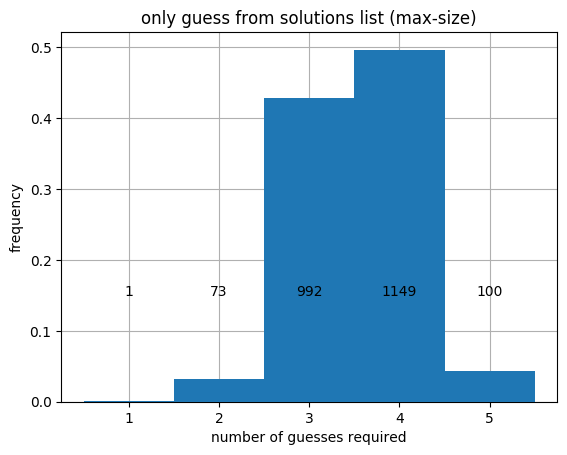

Guess: raise

Proportions
5-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0315335
3     │     0.42851
4     │    0.496328
5     │   0.0431965

Mean Score
3.5503239740820733
  2.527476 seconds (51.92 M allocations: 2.396 GiB, 25.09% gc time, 0.13% compilation time)


In [5]:
@time generate_stats(
    guess_all_words = false,
    hard_mode = false,
    heuristic = PRIORITIZE_MAX_GROUP_SIZE
)

### Using only solution words as guesses, prioritizing max splits

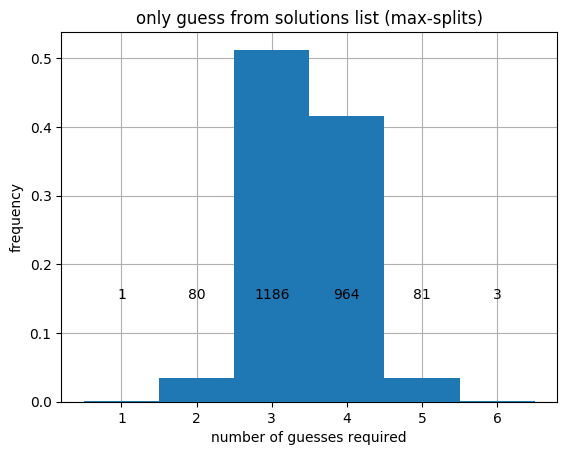

Guess: trace

Proportions
6-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0345572
3     │    0.512311
4     │    0.416415
5     │   0.0349892
6     │   0.0012959

Mean Score
3.4548596112311016
  2.096255 seconds (49.31 M allocations: 2.272 GiB, 16.73% gc time)


In [6]:
@time generate_stats(
    guess_all_words = false,
    hard_mode = false,
    heuristic = PRIORITIZE_SPLITS
)

### Using all possible words as guesses, prioritizing entropy

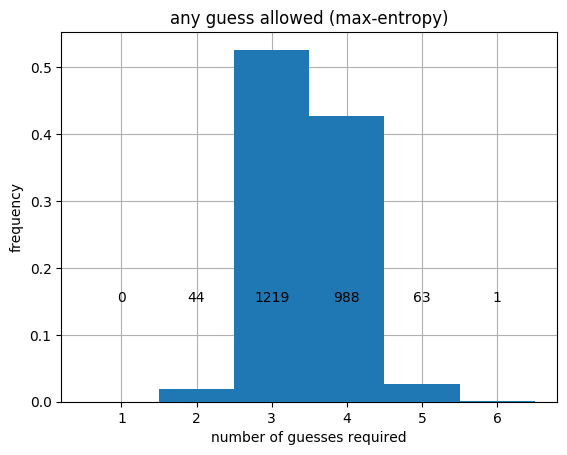

Guess: soare

Proportions
5-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
2     │   0.0190065
3     │    0.526566
4     │    0.426782
5     │   0.0272138
6     │ 0.000431965

Mean Score
3.4634989200863933
 12.726652 seconds (290.44 M allocations: 12.845 GiB, 21.87% gc time)


In [7]:
@time generate_stats(
    guess_all_words = true,
    hard_mode = false,
    heuristic = PRIORITIZE_ENTROPY
)

### Using all possible words as guesses, prioritizing maxsize

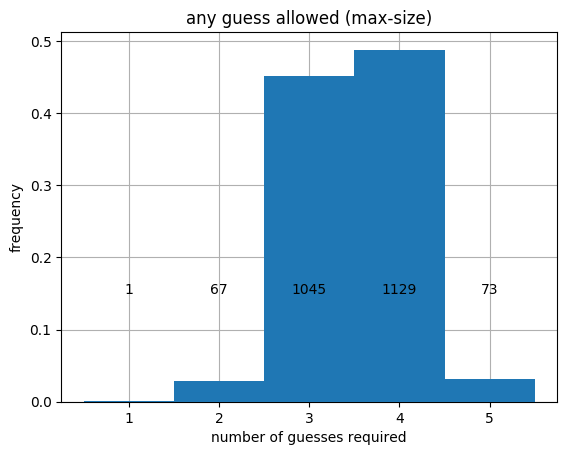

Guess: raise

Proportions
5-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0289417
3     │    0.451404
4     │    0.487689
5     │   0.0315335

Mean Score
3.5209503239740823
 14.121903 seconds (300.77 M allocations: 13.410 GiB, 18.89% gc time)


In [8]:
@time generate_stats(
    guess_all_words = true,
    hard_mode = false,
    heuristic = PRIORITIZE_MAX_GROUP_SIZE
)

### Using all possible words as guesses, prioritizing max splits

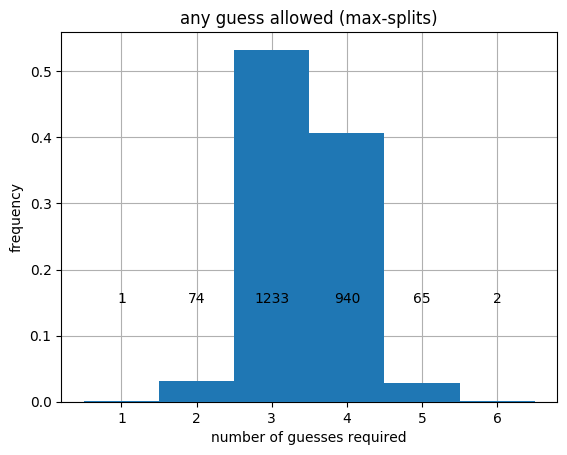

Guess: trace

Proportions
6-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0319654
3     │    0.532613
4     │    0.406048
5     │   0.0280778
6     │ 0.000863931

Mean Score
3.4319654427645787
 13.649576 seconds (284.48 M allocations: 12.602 GiB, 19.26% gc time)


In [9]:
@time generate_stats(
    guess_all_words = true,
    hard_mode = false,
    heuristic = PRIORITIZE_SPLITS
)

### Using only solutions words as guesses + hard mode, prioritizing entropy

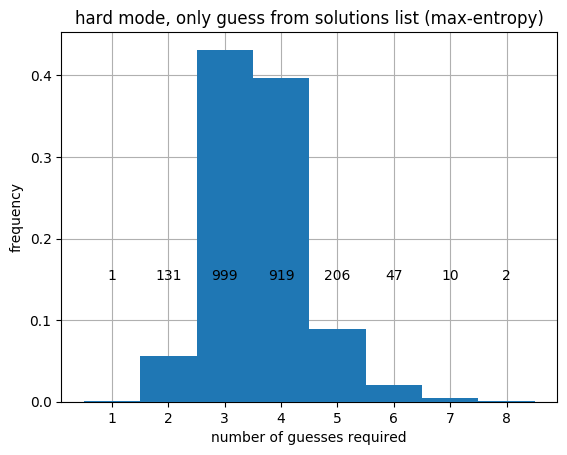

Guess: raise

Proportions
8-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0565875
3     │    0.431533
4     │    0.396976
5     │   0.0889849
6     │   0.0203024
7     │  0.00431965
8     │ 0.000863931

Mean Score
3.6
  0.721388 seconds (15.45 M allocations: 551.291 MiB, 10.02% gc time)


In [10]:
@time generate_stats(
    guess_all_words = false,
    hard_mode = true,
    heuristic = PRIORITIZE_ENTROPY
)

### Using only solutions words as guesses + hard mode, prioritizing maxsize

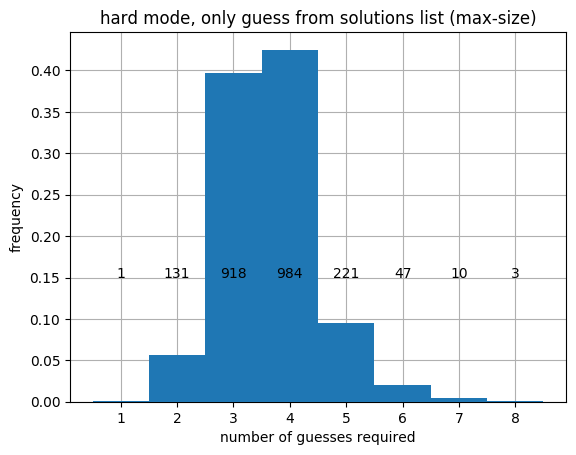

Guess: raise

Proportions
8-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0565875
3     │    0.396544
4     │    0.425054
5     │   0.0954644
6     │   0.0203024
7     │  0.00431965
8     │   0.0012959

Mean Score
3.643196544276458
  0.738441 seconds (15.43 M allocations: 551.190 MiB, 10.52% gc time)


In [11]:
@time generate_stats(
    guess_all_words = false,
    hard_mode = true,
    heuristic = PRIORITIZE_MAX_GROUP_SIZE
)

### Using only solutions words as guesses + hard mode, prioritizing max splits

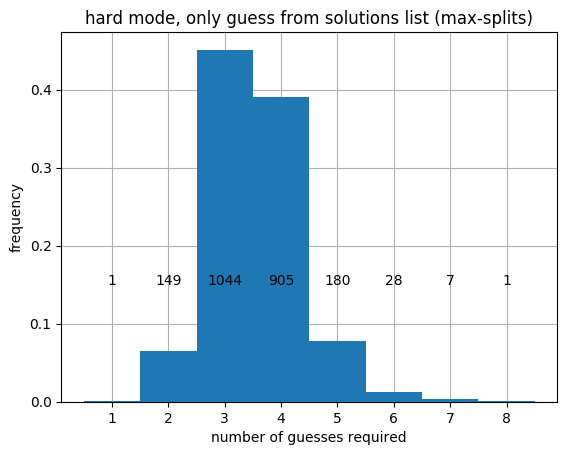

Guess: trace

Proportions
8-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0643629
3     │    0.450972
4     │    0.390929
5     │   0.0777538
6     │    0.012095
7     │  0.00302376
8     │ 0.000431965

Mean Score
3.5317494600431965
  0.813628 seconds (15.30 M allocations: 551.385 MiB, 19.41% gc time)


In [12]:
@time generate_stats(
    guess_all_words = false,
    hard_mode = true,
    heuristic = PRIORITIZE_SPLITS
)

### Using all possible words as guesses + hard mode, prioritizing entropy

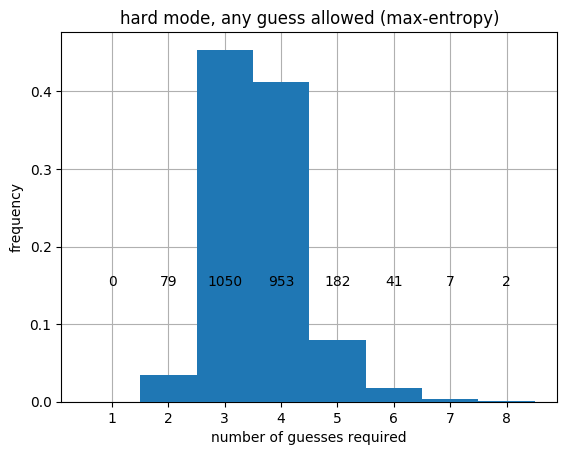

Guess: soare

Proportions
7-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
2     │   0.0341253
3     │    0.453564
4     │    0.411663
5     │   0.0790497
6     │   0.0177106
7     │  0.00302376
8     │ 0.000863931

Mean Score
3.605183585313175
  4.246831 seconds (91.46 M allocations: 3.064 GiB, 22.46% gc time)


In [13]:
@time generate_stats(
    guess_all_words = true,
    hard_mode = true,
    heuristic = PRIORITIZE_ENTROPY
)

### Using all possible words as guesses + hard mode, prioritizing maxsize

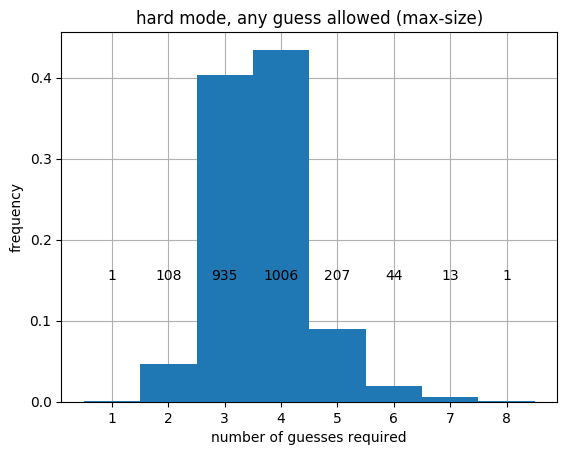

Guess: raise

Proportions
8-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0466523
3     │    0.403888
4     │    0.434557
5     │   0.0894168
6     │   0.0190065
7     │  0.00561555
8     │ 0.000431965

Mean Score
3.647516198704104
  4.472704 seconds (91.64 M allocations: 3.070 GiB, 25.08% gc time)


In [14]:
@time generate_stats(
    guess_all_words = true,
    hard_mode = true,
    heuristic = PRIORITIZE_MAX_GROUP_SIZE
)

### Using all possible words as guesses + hard mode, prioritizing max splits

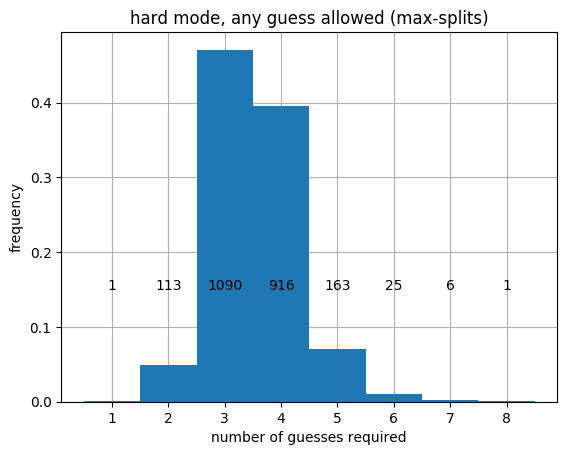

Guess: trace

Proportions
8-element Named Vector{Float64}
Dim1  │ 
──────┼────────────
1     │ 0.000431965
2     │   0.0488121
3     │    0.470842
4     │     0.39568
5     │   0.0704104
6     │   0.0107991
7     │  0.00259179
8     │ 0.000431965

Mean Score
3.5317494600431965
  4.421094 seconds (91.97 M allocations: 3.107 GiB, 18.68% gc time)


In [15]:
@time generate_stats(
    guess_all_words = true,
    hard_mode = true,
    heuristic = PRIORITIZE_SPLITS
)